<a href="https://colab.research.google.com/github/IA2021UR/trabajo-ia-en-la-comunidad-de-la-rioja-equipo-2/blob/main/ImagenATexto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13945 sha256=0e2d502a12d9bc91c52b5ae3c0e034db81b322ac2169764e1b6f3172a66f7401
  Stored in directory: /root/.cache/pip/wheels/81/20/7e/1dd0daad1575d5260916bb1e9781246430647adaef4b3ca3b3
Successfully built pytesseract


In [1]:
import pytesseract
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt
from collections import namedtuple

In [4]:
!unzip Prueba.zip

Archive:  Prueba.zip
  inflating: pagina1.jpg             
  inflating: 26119A00100021_page-0002.jpg  


In [2]:
def mostrarImagen(image):
    if len(image.shape)==3:
        img2 = image[:,:,::-1]
        plt.figure(figsize = (180,18))
        plt.imshow(img2,)
        
        plt.show()
    else:
        img2 = image
        plt.figure(figsize = (180,18))
        plt.imshow(img2,cmap='gray',shape=600)
        
        plt.show()

In [3]:
imagen=cv2.imread("pagina1.jpg")

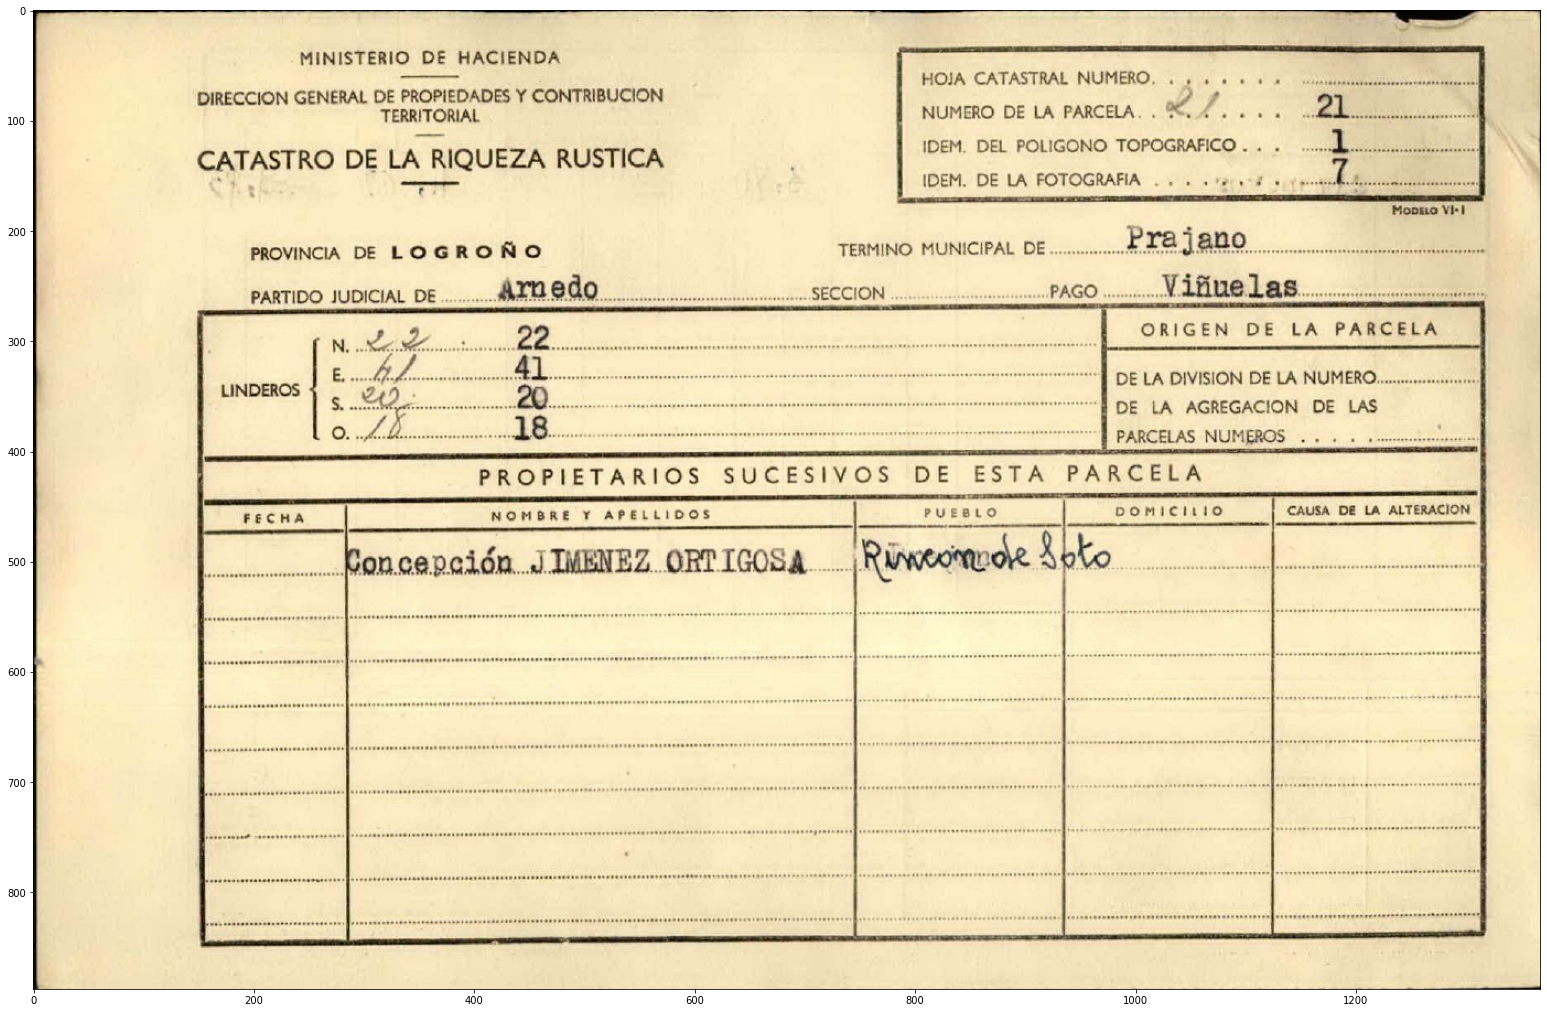

In [4]:
mostrarImagen(imagen)

In [4]:
OCRLocation = namedtuple ( "OCRLocation" , [ "id" , "bbox" ])

In [5]:
OCR_Locations=[
    OCRLocation("termino_municipal",(940,185,310,40)),
    OCRLocation("partido_judicial",(380,225,300,45)),
    OCRLocation("numero de parcela",(1150,68,150,31))
    ]

In [10]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 34 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,407 kB/s)
debconf: unable to initi

In [6]:
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

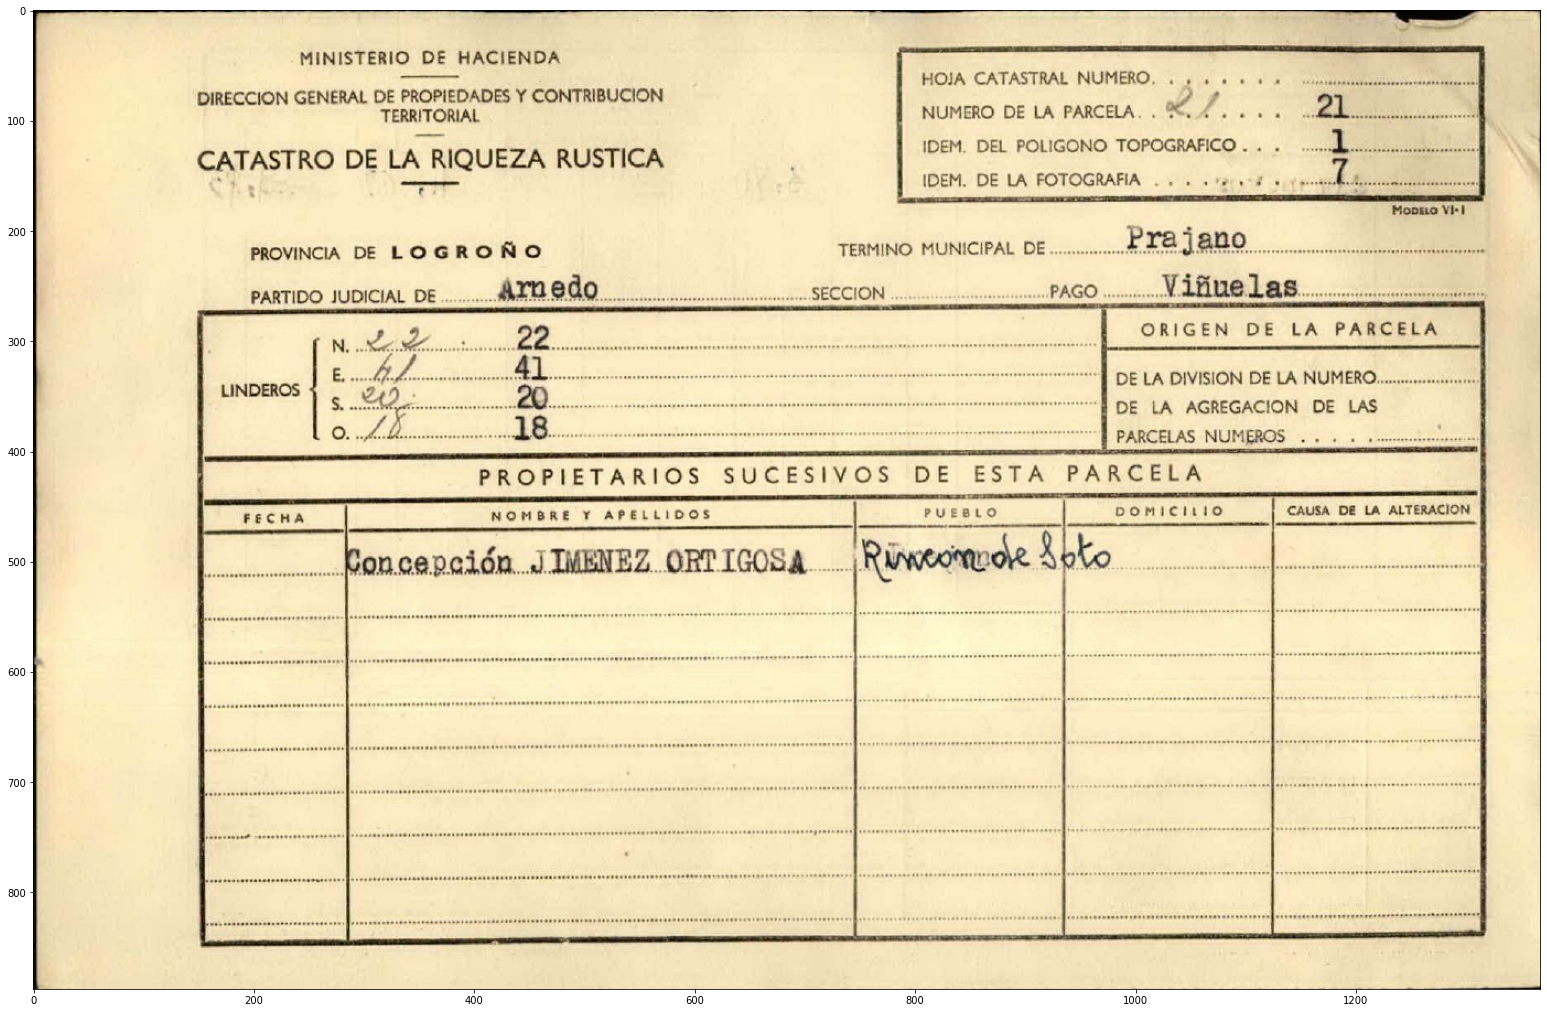

In [6]:

mostrarImagen(imagen)

In [14]:

text2=pytesseract.image_to_string(imagen,config="outputbase digits")
text2

" \n\nMINISTERIO DE HACIENDA\n\n \n\nHOJA CATASTRAL NUMERO\n\nDIRECCION GENERAL DE PROPIEDADES Y CONTRIBUCION\nTERRITORIAL RO DE LA PARCELA\n\nCATASTRO DE LA RIQUEZA RUSTICA\n\n \n\nMopua vel\n\nPROVINCIA DE LOGRONO TERING FUNICIPAL DE... PTB J awo\nPARTIDO JUDICIAL DE ammedo secC'ON PAGO Vifiuelas\n\n \n   \n  \n\nORIGEN DE LA PARCELA\n\n \n     \n    \n\nCE LA DIVISION DE LA NUMERO... cso\n18 GE LA AGREGACION DE LAS\n. | PARCELAS NUMEROS\n\nPROPIETARIOS SUCESIVOS DE ESTA PARCELA\n\n        \n\nLINDEROS\n\n \n\nMOMBRE TY APELLIDOS panicle\n\na\non.ceraidn..TWANEZ ORT IGUSA Rinweciny de Abko\n\nI CAUSA DE LA ALTERACION\n\n \n\x0c"

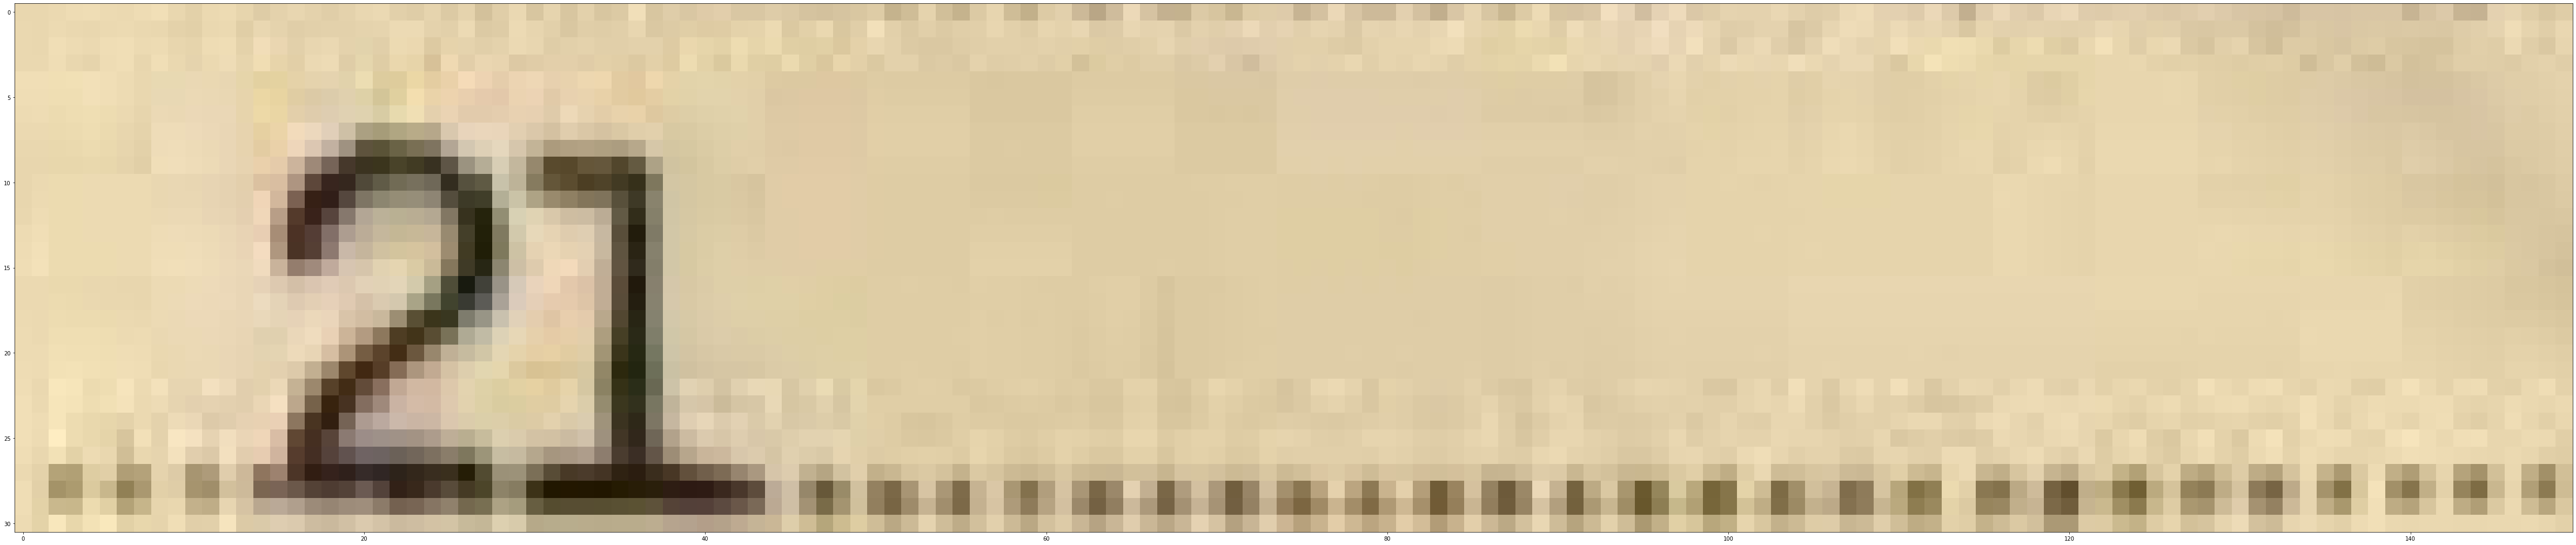

In [8]:
(x,y,w,h)=OCR_Locations[2].bbox
roi=imagen[y:y + h, x:x + w]
mostrarImagen(roi)

In [9]:

roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
(thresh, roi) = cv2.threshold(roi, 127, 255, cv2.THRESH_BINARY)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The 'shape' parameter of imshow() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'shape', they should be pass as keyword, not positionally.
  # This is added back by InteractiveShellApp.init_path()


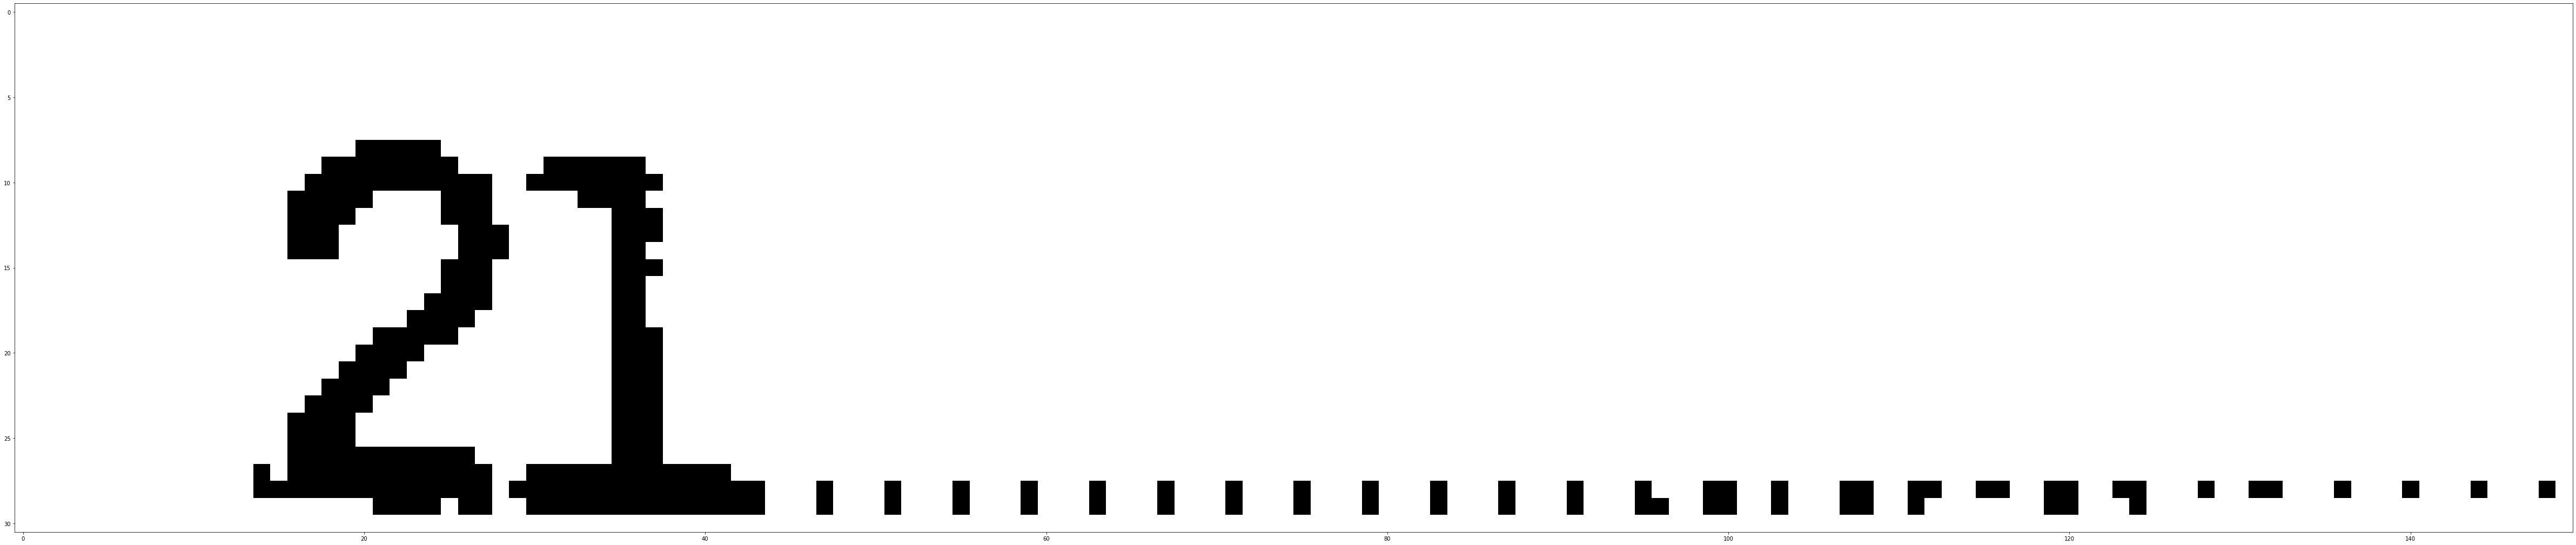

In [31]:

mostrarImagen(roi)

In [11]:
print(pytesseract.image_to_string(roi,config='--psm 7'))

21.



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The 'shape' parameter of imshow() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'shape', they should be pass as keyword, not positionally.
  # This is added back by InteractiveShellApp.init_path()


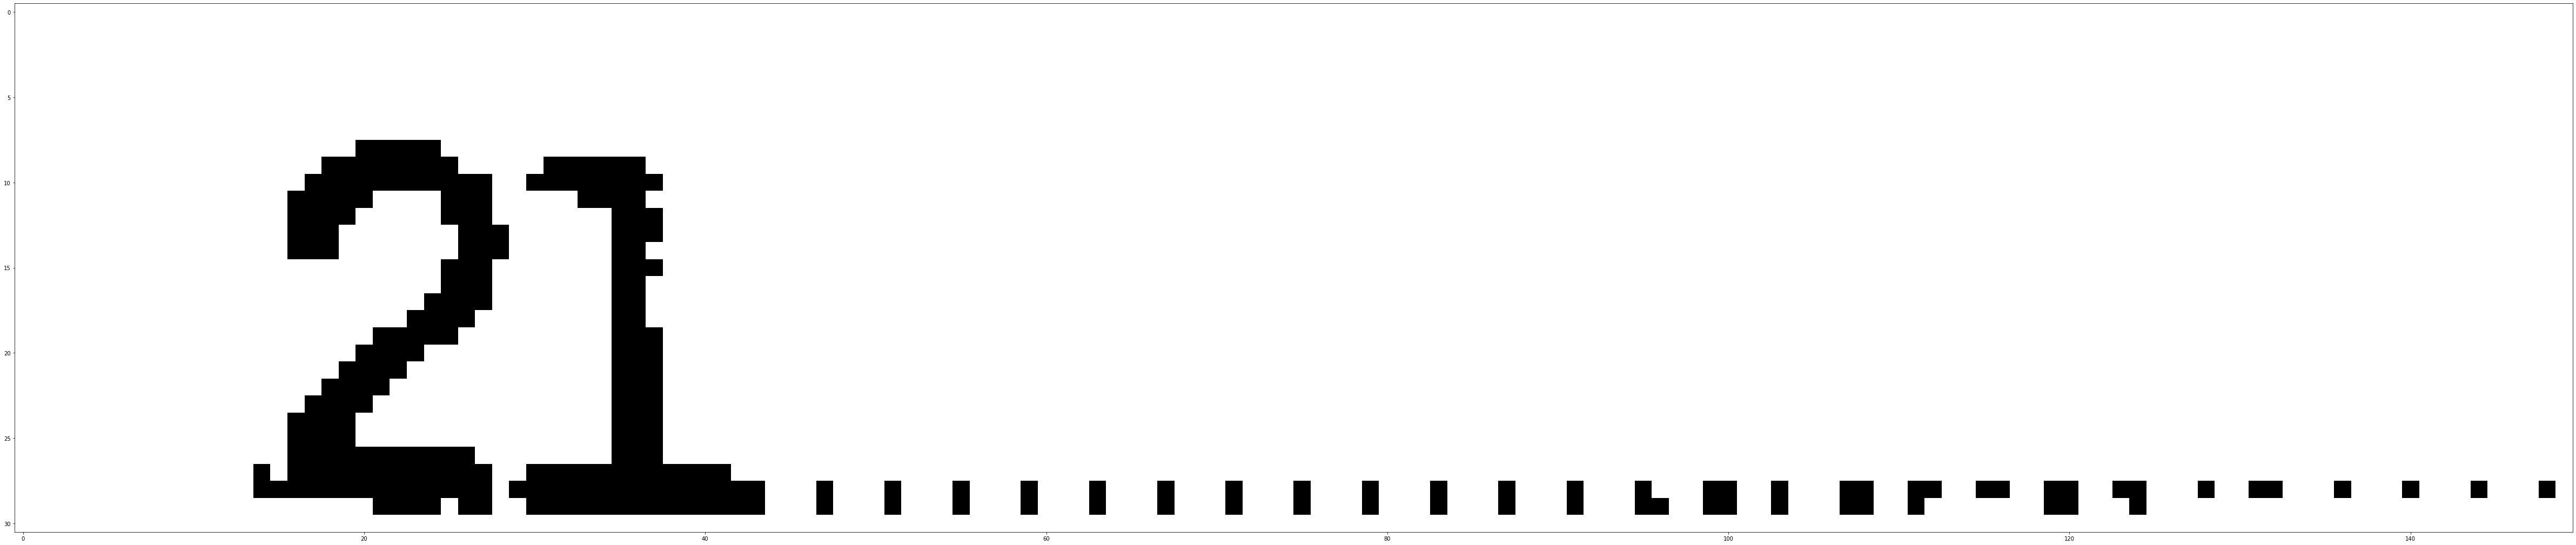

In [10]:
mostrarImagen(roi)

In [8]:
parsingResults=[]
for loc in OCR_Locations:
  (x,y,w,h)=loc.bbox
  roi=imagen[y:y + h, x:x + w]


  roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
  (thresh, roi) = cv2.threshold(roi, 127, 255, cv2.THRESH_BINARY)
  text=pytesseract.image_to_string(roi,config='--psm 8')
  print(text)

  for line in text.split("\n"):
    if(len(line))==0:
      continue
    
    lower=line.lower()
    count = 0

    if count==0:
      parsingResults.append((loc,line))

_ prajano ...

armmedo

1a.



In [8]:
results={}

for(loc,line) in parsingResults:
  r=results.get(loc.id,None)

  if r is None:
    results[loc.id]=(line,loc._asdict())
  else:
    (existingText,loc)=r
    text="{}\n".format(existingText,line)

    results[loc["id"]]=(text,loc)

In [9]:
def cleanup_text(text):
	# strip out non-ASCII text so we can draw the text on the image
	# using OpenCV
	return "".join([c if ord(c) < 128 else "" for c in text]).strip()

In [10]:
for (locID,result) in results.items():
  (text,loc)=result
  print(loc["id"])
  print("=" * len(loc["id"]))
  print("{}\n\n".format(text))
  (x,y,w,h)=loc["bbox"]
  clean=cleanup_text(text)
  cv2.rectangle(imagen,(x,y),(x+w,y+h),(0,255,0,2))
  for (i,line) in enumerate(text.split("\n")):
    startY=y+(i*70)+40
    cv2.putText(imagen,line,(x,startY),cv2.FONT_HERSHEY_SIMPLEX,1.8,(0,0,255),2) 

termino_municipal
bra jano



partido_judicial
arnedo




numero de parcela





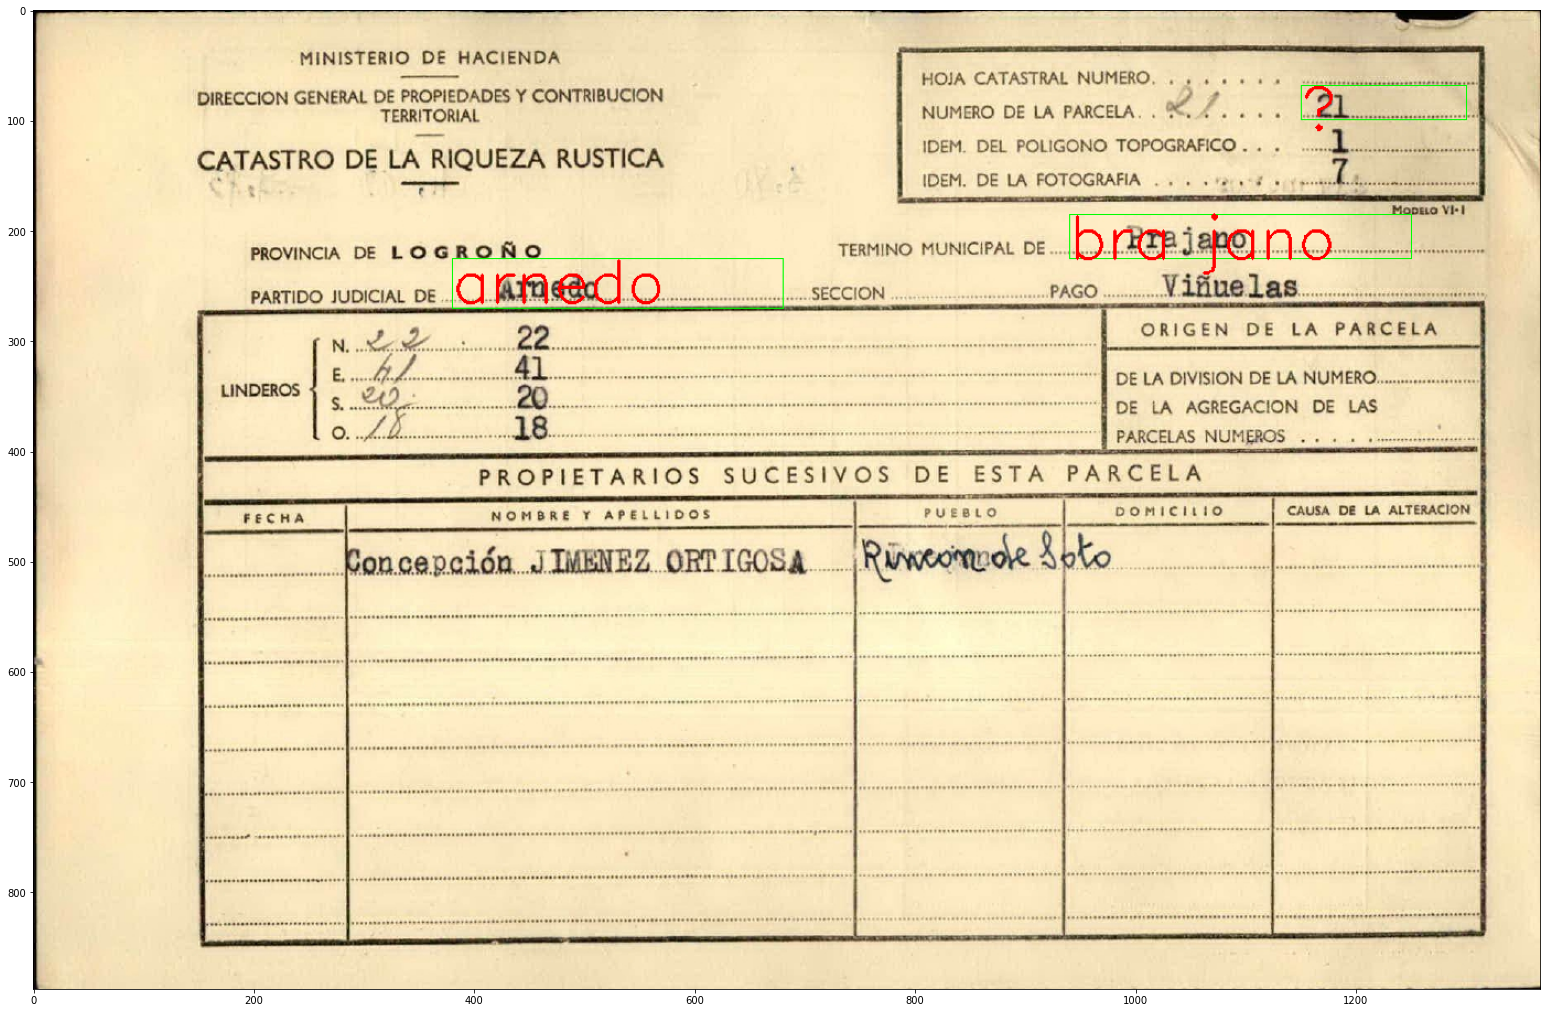

In [13]:
mostrarImagen(imagen)